In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/txtfiles/test (1).txt/test.txt
/kaggle/input/txtfiles/train (1).txt/train.txt
/kaggle/input/gc-train/gc.csv


In [2]:
import tensorflow as tf
from keras.layers import Dropout
from keras.layers import Input
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Reshape
from numpy import newaxis
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/kaggle/input/gc-train/gc.csv')

In [4]:
df.head()

,0,1,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
0,0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.5750,0.7947,0.4663,0.4303,0.3643,0.0558,0.1330,0.0295
1,0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.2560,0.0597,0.5751,0.7797,0.8544
2,0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.1970,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
3,0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.4110,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
4,0,6.0,0.9538,0.3029,0.4227,0.7774,0.5194,0.7531,0.4816,0.9918,...,0.2433,0.2040,0.1013,0.6044,0.9570,0.8958,0.8006,0.5282,0.4132,0.4582


In [5]:
df= df.T.reset_index().T
df.reset_index(inplace= True)
df.drop(['index'], axis= 1, inplace= True)
list = []
for i in range(25):
    list.append(f'sensor {i+1}')

list.insert(0,'Sample Id')
list.insert(1,'Time Point')
df.columns= list

In [6]:
df

,Sample Id,Time Point,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,...,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21,sensor 22,sensor 23,sensor 24,sensor 25
0,0,1,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
1,0.0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.575,0.7947,0.4663,0.4303,0.3643,0.0558,0.133,0.0295
2,0.0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.256,0.0597,0.5751,0.7797,0.8544
3,0.0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.197,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
4,0.0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.411,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549995,49999.0,7.0,0.2817,0.6392,0.9709,0.5667,0.0822,0.9976,0.7358,0.9617,...,0.96,0.4254,0.7402,0.2611,0.8659,0.7473,0.1093,0.3094,0.7807,0.7287
549996,49999.0,8.0,0.5622,0.7094,0.1205,0.7765,0.5579,0.4585,0.0583,0.1459,...,0.7685,0.741,0.9113,0.3729,0.1165,0.0866,0.2817,0.4906,0.7756,0.5428
549997,49999.0,9.0,0.3565,0.4717,0.6521,0.6147,0.2524,0.3296,0.1769,0.9617,...,0.5341,0.8423,0.509,0.8436,0.9809,0.2696,0.5609,0.6706,0.1297,0.8826
549998,49999.0,10.0,0.7871,0.2163,0.1643,0.2265,0.9406,0.6559,0.583,0.4123,...,0.2767,0.0436,0.8426,0.2371,0.6578,0.027,0.7201,0.4489,0.4848,0.5125


In [7]:
df['label']=''

In [8]:
label_list= []
for i in range(10, df.shape[0], 11):
    if int(df.iloc[i]['Sample Id'])==3:
        label_list.append((int(df.iloc[i]['Sample Id']), i))
df_means= []
for label in label_list:
    temp= df[label[1]-10:label[1]]
    temp= temp.apply(pd.to_numeric)
    df_means.append(temp)

In [9]:
label_list

[(3, 32),
 (3, 76),
 (3, 120),
 (3, 131),
 (3, 307),
 (3, 329),
 (3, 384),
 (3, 483),
 (3, 505),
 (3, 527),
 (3, 538),
 (3, 549),
 (3, 593),
 (3, 615),
 (3, 648),
 (3, 692),
 (3, 714),
 (3, 725),
 (3, 824),
 (3, 835),
 (3, 879),
 (3, 934),
 (3, 978),
 (3, 1044),
 (3, 1055),
 (3, 1099),
 (3, 1154),
 (3, 1176),
 (3, 1253),
 (3, 1286),
 (3, 1319),
 (3, 1330),
 (3, 1385),
 (3, 1561),
 (3, 1649),
 (3, 1693),
 (3, 1737),
 (3, 1770),
 (3, 1847),
 (3, 1858),
 (3, 1913),
 (3, 1957),
 (3, 2012),
 (3, 2045),
 (3, 2067),
 (3, 2133),
 (3, 2144),
 (3, 2166),
 (3, 2188),
 (3, 2254),
 (3, 2287),
 (3, 2353),
 (3, 2364),
 (3, 2463),
 (3, 2540),
 (3, 2551),
 (3, 2562),
 (3, 2573),
 (3, 2628),
 (3, 2639),
 (3, 2705),
 (3, 2727),
 (3, 2760),
 (3, 2793),
 (3, 2837),
 (3, 2870),
 (3, 2925),
 (3, 2936),
 (3, 3013),
 (3, 3024),
 (3, 3035),
 (3, 3101),
 (3, 3123),
 (3, 3189),
 (3, 3222),
 (3, 3321),
 (3, 3343),
 (3, 3354),
 (3, 3409),
 (3, 3420),
 (3, 3442),
 (3, 3497),
 (3, 3508),
 (3, 3519),
 (3, 3662),
 (3, 

In [ ]:
import random
df_all= pd.concat(random.sample(df_means, 20))

In [12]:
df_all

,Sample Id,Time Point,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,...,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21,sensor 22,sensor 23,sensor 24,sensor 25,label
167640,15240.0,1.0,0.2126,0.9014,0.9391,0.7842,0.1166,0.9135,0.3732,0.5651,...,0.5893,0.3442,0.0900,0.6225,0.3446,0.7577,0.3004,0.3010,0.6955,NaN
167641,15240.0,2.0,0.1632,0.8751,0.9414,0.2709,0.8657,0.2807,0.4323,0.7159,...,0.4460,0.6453,0.0709,0.3286,0.0411,0.2569,0.9180,0.3340,0.3470,NaN
167642,15240.0,3.0,0.5405,0.6786,0.0535,0.7897,0.9283,0.6977,0.9530,0.7522,...,0.0640,0.1191,0.3599,0.4104,0.9053,0.7933,0.8052,0.4993,0.8642,NaN
167643,15240.0,4.0,0.0826,0.4892,0.0699,0.9493,0.8232,0.3657,0.4387,0.4506,...,0.6978,0.5220,0.0102,0.9804,0.5591,0.7804,0.0444,0.6782,0.1404,NaN
167644,15240.0,5.0,0.4035,0.5322,0.8824,0.1575,0.9804,0.6954,0.2401,0.4695,...,0.0198,0.5132,0.9866,0.0997,0.1667,0.2894,0.7974,0.6888,0.2996,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302274,27479.0,6.0,0.3378,0.0851,0.4344,0.2226,0.9681,0.6573,0.8914,0.9943,...,0.3456,0.2124,0.6465,0.6943,0.9414,0.9162,0.9826,0.7741,0.3651,NaN
302275,27479.0,7.0,0.5110,0.6061,0.4369,0.3163,0.3140,0.6461,0.6541,0.3991,...,0.3900,0.0759,0.2838,0.2655,0.9706,0.1366,0.5599,0.1831,0.7831,NaN
302276,27479.0,8.0,0.2030,0.0732,0.6993,0.1856,0.7961,0.0132,0.6454,0.4022,...,0.3800,0.7094,0.0556,0.6902,0.3104,0.2883,0.0290,0.3351,0.5721,NaN
302277,27479.0,9.0,0.2944,0.3057,0.6575,0.8031,0.4376,0.4406,0.9549,0.4596,...,0.3229,0.3919,0.2609,0.3870,0.4149,0.5997,0.7670,0.0731,0.6041,NaN


In [ ]:
sns.histplot(df_all)
plt.show()

In [31]:
df2=df_all.sample(n=5,axis=1)
df2

,sensor 13,sensor 23,sensor 8,sensor 4,sensor 15
480590,0.7306,0.4291,0.2623,0.8145,0.8985
480591,0.9223,0.7858,0.9479,0.6510,0.5672
480592,0.3624,0.2178,0.5874,0.5679,0.1279
480593,0.0207,0.3691,0.5859,0.9459,0.8873
480594,0.9631,0.7389,0.9572,0.8235,0.9268
...,...,...,...,...,...
44709,0.0813,0.2883,0.3099,0.7471,0.4413
44710,0.2139,0.7900,0.0409,0.8622,0.9759
44711,0.3966,0.7184,0.9218,0.6597,0.0129
44712,0.4440,0.6405,0.4706,0.7487,0.5763


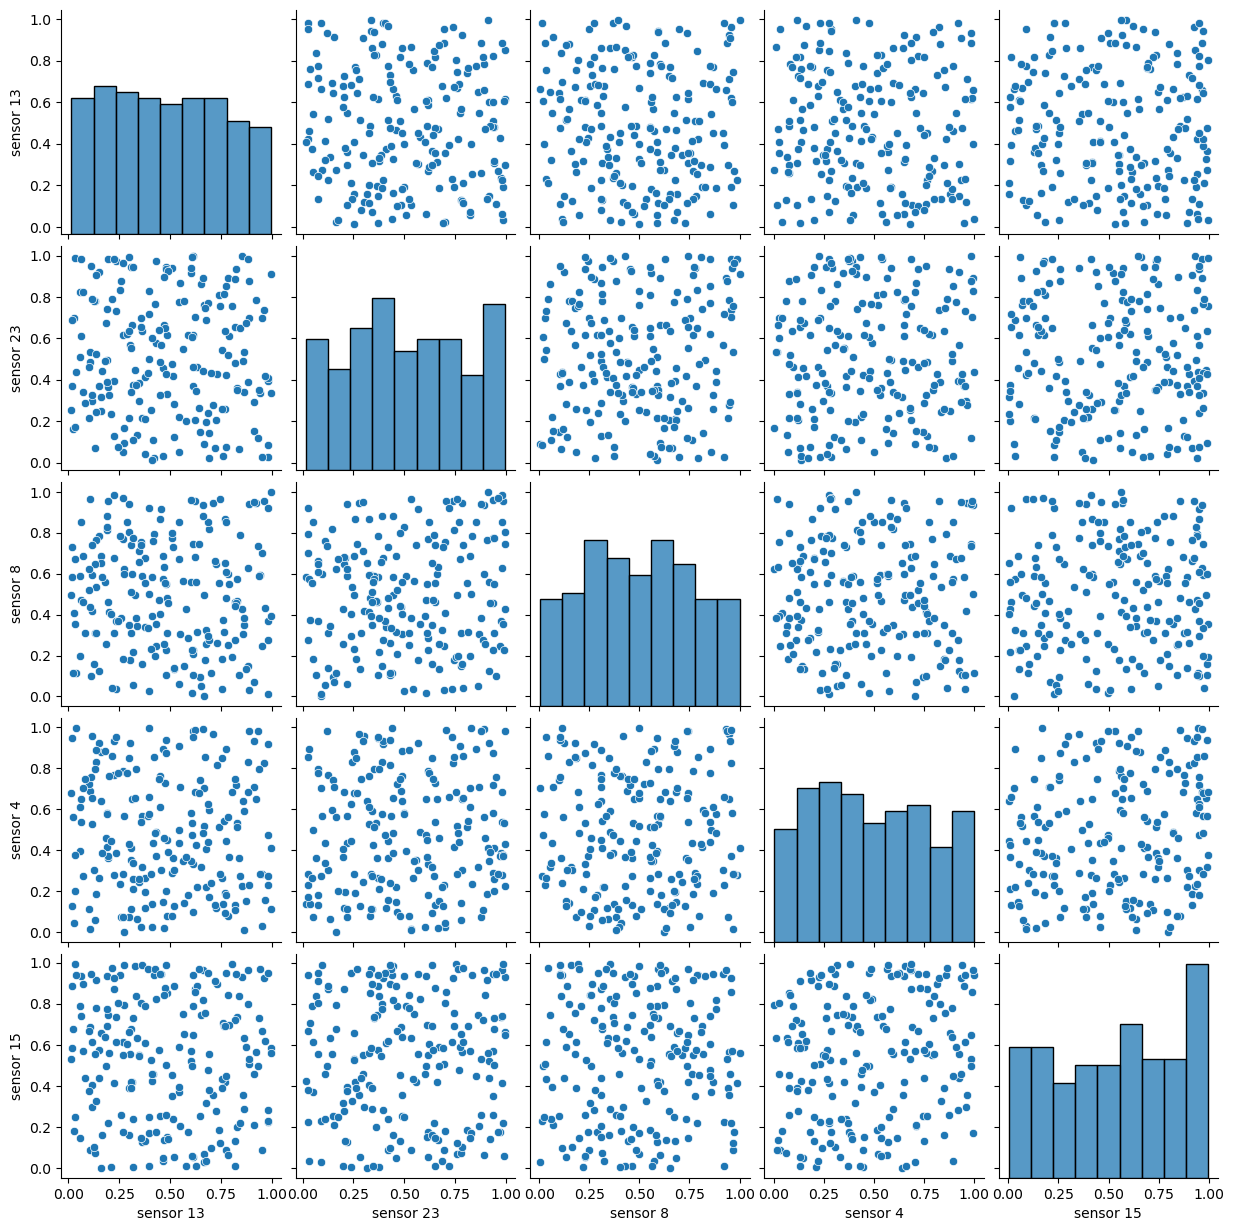

In [32]:
sns.pairplot(df2)
plt.show()

In [8]:
df_means= []

In [ ]:
for label in label_list:
    temp= df[label[1]-10:label[1]]
    temp['label']= label[0]
    temp= temp.apply(pd.to_numeric)
    df_means.append(temp)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df_means[0]

NameError: name 'df_means' is not defined

In [10]:
inputs= []
outputs= []

for pddf in df_means:
    input_1= pddf.drop(['Sample Id', 'Time Point', 'label'], axis= 1).values.tolist()
    output_1= pddf['label'].tolist()
    temp_input= [x for sublist in input_1 for x in sublist]
    inputs.append(temp_input)
    outputs.append(output_1)

In [11]:
print(len(inputs))

50000


In [12]:
print(len(outputs))

50000


In [13]:
outputs= [output[0] for output in outputs]


In [14]:
len(outputs)

50000

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs, outputs, test_size = 0.3, random_state = 42)

In [16]:
y_train = pd.DataFrame(y_train)
y_train.shape
y_train_rf = y_train

In [17]:
import pandas as pd

# assume your list is called 'my_lis
X_train_df = pd.DataFrame(X_train, columns=[f'col{i}' for i in range(250)])
X_test_df = pd.DataFrame(X_test, columns=[f'col{i}' for i in range(250)])

In [18]:
X_train_df.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249
0,0.0871,0.2773,0.1937,0.5658,0.2802,0.3324,0.6183,0.2011,0.6450,0.6330,...,0.4496,0.7516,0.8352,0.5363,0.9576,0.9579,0.9864,0.6364,0.5752,0.9393
1,0.4004,0.9298,0.3890,0.4950,0.5330,0.2584,0.9245,0.2985,0.4512,0.9561,...,0.9365,0.6443,0.6410,0.3199,0.9111,0.6942,0.6224,0.9746,0.6076,0.0650
2,0.6210,0.5675,0.3488,0.4792,0.4269,0.9696,0.6162,0.3784,0.1133,0.2257,...,0.5150,0.0441,0.8316,0.3067,0.2226,0.1730,0.2254,0.3169,0.1936,0.2541
3,0.5862,0.3266,0.1114,0.3996,0.9893,0.2874,0.4878,0.2708,0.3079,0.5443,...,0.4794,0.2272,0.6624,0.4301,0.9856,0.8310,0.0564,0.9783,0.8252,0.2225
4,0.5817,0.7744,0.7011,0.9623,0.7921,0.1721,0.3295,0.6855,0.6489,0.6044,...,0.1310,0.6957,0.0235,0.6844,0.5716,0.1540,0.8365,0.9052,0.4255,0.8076


In [19]:
X_train_df= X_train_df.to_numpy()
X_test_df = X_test_df.to_numpy()

In [20]:
# X_Train_df =np.expand_dims( X_Train_df,axis = -1)

# X_Train_df.shape

In [21]:
X_train_df = X_train_df.reshape((X_train_df.shape[0], X_train_df.shape[1], 1))
X_test_df =  X_test_df.reshape((X_test_df.shape[0], X_test_df.shape[1], 1))


In [22]:
X_train_df

array([[[0.0871],
        [0.2773],
        [0.1937],
        ...,
        [0.6364],
        [0.5752],
        [0.9393]],

       [[0.4004],
        [0.9298],
        [0.389 ],
        ...,
        [0.9746],
        [0.6076],
        [0.065 ]],

       [[0.621 ],
        [0.5675],
        [0.3488],
        ...,
        [0.3169],
        [0.1936],
        [0.2541]],

       ...,

       [[0.0319],
        [0.39  ],
        [0.2106],
        ...,
        [0.3705],
        [0.2333],
        [0.1941]],

       [[0.9013],
        [0.6097],
        [0.9625],
        ...,
        [0.2502],
        [0.5864],
        [0.7841]],

       [[0.3928],
        [0.9145],
        [0.3862],
        ...,
        [0.104 ],
        [0.7468],
        [0.9309]]])

In [23]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)
y_train_cat

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [24]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(32, 1, activation='relu', input_shape=(250, 1)),
#                                     tf.keras.layers.LSTM(10, activation= 'tanh', recurrent_activation= 'relu', dropout= 0.2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(4, activation=tf.nn.softmax)])
          
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 250, 32)           64        
                                                                 
 flatten (Flatten)           (None, 8000)              0         
                                                                 
 dense (Dense)               (None, 1024)              8193024   
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 8,328,548
Trainable params: 8,328,548
Non-

In [25]:
# tf.keras.utils.to_categorical(y_train, num_classes= 4)

In [26]:
y_train_cat.shape

(35000, 4)

In [27]:
# X_train_df

In [28]:
# y_train= tf.keras.utils.to_categorical(y_train, num_classes= 4)
# y_test= tf.keras.utils.to_categorical(y_test, num_classes= 4)
# train_set= tf.data.Dataset.from_tensor_slices((X_train, y_train))
# test_set= tf.data.Dataset.from_tensor_slices((X_test, y_test))
# model.fit(train_set, batch_size= 20, epochs= 100, validation_data= test_set)

# y_train= np.array(y_train)

model.fit(X_train_df, np.array(y_train_cat),validation_split =0.25 ,batch_size= 2048, epochs= 100)

Epoch 1/100
13/13 [==============================] - 9s 57ms/step - loss: 1.5104 - accuracy: 0.2671 - val_loss: 1.3897 - val_accuracy: 0.2667
Epoch 2/100
13/13 [==============================] - 0s 35ms/step - loss: 1.3834 - accuracy: 0.2855 - val_loss: 1.3841 - val_accuracy: 0.2853
Epoch 3/100
13/13 [==============================] - 0s 35ms/step - loss: 1.3822 - accuracy: 0.2784 - val_loss: 1.3780 - val_accuracy: 0.2863
Epoch 4/100
13/13 [==============================] - 0s 37ms/step - loss: 1.3793 - accuracy: 0.2881 - val_loss: 1.3809 - val_accuracy: 0.2853
Epoch 5/100
13/13 [==============================] - 0s 37ms/step - loss: 1.3733 - accuracy: 0.2963 - val_loss: 1.3744 - val_accuracy: 0.2825
Epoch 6/100
13/13 [==============================] - 0s 37ms/step - loss: 1.3709 - accuracy: 0.3036 - val_loss: 1.3738 - val_accuracy: 0.2936
Epoch 7/100
13/13 [==============================] - 0s 36ms/step - loss: 1.3693 - accuracy: 0.3086 - val_loss: 1.3707 - val_accuracy: 0.3088
Epoch 

In [29]:
loss, accuracy = model.evaluate(X_test_df, np.array(y_test_cat), batch_size=2048)

8/8 [==============================] - 0s 11ms/step - loss: 0.4142 - accuracy: 0.8216


In [30]:
y_pred_1 = model.predict(X_test_df)

469/469 [==============================] - 1s 2ms/step


In [31]:
y_pred_1 = np.argmax(y_pred_1, axis=1)
y_pred_1

array([3, 0, 1, ..., 2, 3, 2])

In [32]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_pred_1)
acc_score

0.8216

In [33]:
pd.DataFrame(y_pred_1).value_counts()

3    4277
0    4097
1    3572
2    3054
dtype: int64

In [34]:
pd.DataFrame(y_test).value_counts()

3    4228
0    4055
2    3457
1    3260
dtype: int64

In [35]:
accuracy

0.8216000199317932

In [36]:
loss

0.41416555643081665

## Another NN Model

In [37]:
model_2 = tf.keras.models.Sequential([tf.keras.layers.Conv1D(32, 1, activation='relu', input_shape=(250, 1),padding = 'same'),
                    
                                      tf.keras.layers.Conv1D(32, 2, activation='relu',padding='same'),
#                                     tf.keras.layers.LSTM(1, activation= 'tanh', recurrent_activation= 'relu', dropout= 0.2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(4, activation=tf.nn.softmax)])
          
model_2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Nadam(1e-3), metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 250, 32)           64        
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 32)           2080      
                                                                 
 flatten_1 (Flatten)         (None, 8000)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2048256   
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 4)                

In [38]:
model_2.fit(X_train_df, np.array(y_train_cat),validation_split =0.25 ,batch_size= 4096, epochs= 100)


Epoch 1/100
7/7 [==============================] - 4s 105ms/step - loss: 1.3833 - accuracy: 0.2780 - val_loss: 1.3795 - val_accuracy: 0.2853
Epoch 2/100
7/7 [==============================] - 0s 60ms/step - loss: 1.3797 - accuracy: 0.2835 - val_loss: 1.3802 - val_accuracy: 0.2867
Epoch 3/100
7/7 [==============================] - 0s 56ms/step - loss: 1.3775 - accuracy: 0.2894 - val_loss: 1.3867 - val_accuracy: 0.2853
Epoch 4/100
7/7 [==============================] - 0s 56ms/step - loss: 1.3763 - accuracy: 0.2931 - val_loss: 1.3785 - val_accuracy: 0.2829
Epoch 5/100
7/7 [==============================] - 0s 55ms/step - loss: 1.3728 - accuracy: 0.3114 - val_loss: 1.3787 - val_accuracy: 0.2887
Epoch 6/100
7/7 [==============================] - 0s 56ms/step - loss: 1.3671 - accuracy: 0.3143 - val_loss: 1.3804 - val_accuracy: 0.2856
Epoch 7/100
7/7 [==============================] - 0s 56ms/step - loss: 1.3585 - accuracy: 0.3252 - val_loss: 1.3889 - val_accuracy: 0.2659
Epoch 8/100
7/7 [==

In [39]:
loss_2, accuracy_2 = model_2.evaluate(X_test_df, np.array(y_test_cat), batch_size=2048)

8/8 [==============================] - 0s 9ms/step - loss: 4.3978 - accuracy: 0.3586


In [40]:
y_pred_2 = model_2.predict(X_test_df)
y_pred_2 = np.argmax(y_pred_2, axis=1)
y_pred_2

469/469 [==============================] - 1s 2ms/step


array([3, 1, 3, ..., 0, 2, 1])

In [41]:
print(f'Loss: {loss_2}')
print(f'Accuracy : {accuracy_2}')

Loss: 4.3977556228637695
Accuracy : 0.358599990606308


In [42]:
# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestClassifier
# accuracy_scores = []
# rf = RandomForestClassifier(criterion='entropy', max_depth=13, n_estimators=50)

# X_re_df = pd.DataFrame(X_train_df.reshape((X_train_df.shape[0], X_train_df.shape[1])))
# print(X_re_df.shape)
# print(y_train_rf.shape)
# k = 10 # or any other value

# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# for fold, (train_idx, val_idx) in enumerate(kf.split(X_re_df, y_train_rf)):
#     print(f"Fold {fold}")
#     X_trai, y_trai = X_re_df.iloc[train_idx], y_train_rf.iloc[train_idx]
#     X_val, y_val = X_re_df.iloc[val_idx], y_train_rf.iloc[val_idx]

#     # Train the model on the training set
#     rf.fit(X_trai, y_trai)

#     # Evaluate the model on the validation set
#     y_pred = rf.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     print(accuracy)
#     accuracy_scores.append(accuracy)

# # Calculate the mean accuracy across all folds
# mean_accuracy = np.mean(accuracy_scores)

# print(f"Mean accuracy: {mean_accuracy:.2f}") 



In [43]:
# x_twod_df = X_train_df.reshape((X_train_df.shape[0], X_train_df.shape[1])).reshape((3500, 10, 25))
# x_twod_df

## Conv2D

In [44]:
train_df_2 = pd.read_csv('/kaggle/input/txtfiles/train (1).txt/train.txt',delimiter = ',')

train_df_2 = train_df_2.T.reset_index().T.reset_index(drop = True)

print(f'Shape of train_df : {train_df_2.shape}')

list = []

for i in range(25):
    list.append(f'sensor {i+1}')
list.insert(0,'Sample Id')
list.insert(1,'Time Point')
train_df_2.columns = list



state_label_list = []
label_index_list = []
print(f'{train_df_2.head(2)}')
for i in range(10, train_df_2.shape[0], 11):
    state_label_list.append(int(train_df_2.iloc[i]['Sample Id']))
    label_index_list.append(i)
y_train_new = []
for i in state_label_list:
    for j in range(10):
        y_train_new.append(i)
train_df_2 = train_df_2.drop(label_index_list)
print(f'Shape of train_df_2 after dropping : {train_df_2.shape}')
X_train_df= train_df_2[['sensor 1', 'sensor 2', 'sensor 3',
       'sensor 4', 'sensor 5', 'sensor 6', 'sensor 7', 'sensor 8', 'sensor 9',
       'sensor 10', 'sensor 11', 'sensor 12', 'sensor 13', 'sensor 14',
       'sensor 15', 'sensor 16', 'sensor 17', 'sensor 18', 'sensor 19',
       'sensor 20', 'sensor 21', 'sensor 22', 'sensor 23', 'sensor 24',
       'sensor 25']]
state_label = pd.DataFrame(state_label_list)
X_train_2,X_test_2,y_train_2,y_test_2= train_test_split(X_train_df,y_train_new, test_size = 0.3, random_state = 42,shuffle = False)







Shape of train_df : (550000, 27)
  Sample Id Time Point sensor 1 sensor 2 sensor 3 sensor 4 sensor 5 sensor 6  \
0         0          1   0.4337   0.7431   0.9390   0.7541   0.9035   0.7943   
1       0.0        2.0   0.7859   0.1925   0.9024   0.8108   0.2016   0.9649   

  sensor 7 sensor 8  ... sensor 16 sensor 17 sensor 18 sensor 19 sensor 20  \
0   0.2622   0.5901  ...    0.5696    0.6407    0.7027    0.7163    0.9954   
1   0.2445   0.8934  ...    0.4259    0.7456     0.575    0.7947    0.4663   

  sensor 21 sensor 22 sensor 23 sensor 24 sensor 25  
0    0.8303    0.1641    0.7893    0.7533    0.2925  
1    0.4303    0.3643    0.0558     0.133    0.0295  

[2 rows x 27 columns]
Shape of train_df_2 after dropping : (500000, 27)


In [45]:
X_train_2 = X_train_2.reset_index(drop = True).astype('float64')
X_test_2 = X_test_2.reset_index(drop = True).astype('float64')

X_train_3d_2 = np.reshape(X_train_2.values, (35000, 10, 25))
X_test_3d = np.reshape(X_test_2.values, (15000, 10, 25))

from keras.utils import to_categorical
y_train_2 = pd.DataFrame(y_train_2)
y_train_2.columns = ['col1']
y_test_2 = pd.DataFrame(y_test_2)
y_test_2.columns = ['col1']

In [46]:

y_train_unique_df = pd.DataFrame(y_train_2.groupby(y_train_2.index // 10).agg({'col1': 'unique'}))
y_test_unique_df = pd.DataFrame(y_test_2.groupby(y_test_2.index // 10).agg({'col1': 'unique'}))
print(y_train_2.value_counts())
print(y_test_2.value_counts())

col1
3       98870
0       95170
2       79750
1       76210
dtype: int64
col1
3       42200
0       40820
2       34020
1       32960
dtype: int64


In [47]:
print(y_train_unique_df.head(2))
y_train_unique_df = y_train_unique_df['col1'].apply(lambda x :x[0])
y_test_unique_df = y_test_unique_df['col1'].apply(lambda x :x[0])

  col1
0  [1]
1  [2]


In [48]:
y_train_unique_df.value_counts()

3    9887
0    9517
2    7975
1    7621
Name: col1, dtype: int64

In [49]:
y_test_unique_df.value_counts()

3    4220
0    4082
2    3402
1    3296
Name: col1, dtype: int64

In [51]:


y_train_cat_2 = to_categorical(y_train_unique_df, num_classes=4)
y_test_cat_2 = to_categorical(y_test_unique_df, num_classes=4)


X_test_3d = np.reshape(X_test_2.values, (15000, 10, 25))
print(f'shape of X_train_3d : {X_train_3d_2.shape}\n')
print(f'shape of y_train_cat : {y_train_cat_2}\n')
print(f'shape of X_test_3d : {X_test_3d.shape}\n')
print(f'shape of y_test_cat : {y_test_cat_2}\n')

shape of X_train_3d : (35000, 10, 25)

shape of y_train_cat : [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

shape of X_test_3d : (15000, 10, 25)

shape of y_test_cat : [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]



In [55]:
import tensorflow as tf

from tensorflow.keras.layers import Dense , Conv2D, Flatten
input_shape = (10, 25,1)


model_3 = Sequential()


model_3.add(Conv2D(256, 1, activation='relu', input_shape=input_shape))


model_3.add(Conv2D(32, 3, activation='relu'))

model_3.add(Flatten())

model_3.add(Dense(128, activation='relu'))

model_3.add(Dense(32, activation='relu'))

model_3.add(Dense(4, activation='softmax'))


model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 25, 256)       512       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 23, 32)         73760     
                                                                 
 flatten_2 (Flatten)         (None, 5888)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               753792    
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 4)                 132       
                                                                 
Total params: 832,324
Trainable params: 832,324
Non-tr

In [ ]:
from keras.utils import to_categorical
X_train_3d = np.expand_dims(X_train_3d_2, axis = -1)
print(X_train_3d.shape)

y_train_cat = y_train_cat.astype('float64')
y_test_cat = y_test_cat.astype('float64')
print(y_train_cat.shape)
y_train_cat

model_3.fit(X_train_3d_2,np.array(y_train_cat_2),batch_size = 512,validation_split = 0.25,epochs = 100)

(35000, 10, 25, 1)
(35000, 4)
Epoch 1/100
52/52 [==============================] - 4s 21ms/step - loss: 1.3829 - accuracy: 0.2726 - val_loss: 1.3781 - val_accuracy: 0.2848
Epoch 2/100
52/52 [==============================] - 1s 17ms/step - loss: 1.3805 - accuracy: 0.2849 - val_loss: 1.3775 - val_accuracy: 0.2848
Epoch 3/100
52/52 [==============================] - 1s 16ms/step - loss: 1.3731 - accuracy: 0.2970 - val_loss: 1.3607 - val_accuracy: 0.3146
Epoch 4/100
52/52 [==============================] - 1s 16ms/step - loss: 1.3456 - accuracy: 0.3294 - val_loss: 1.3295 - val_accuracy: 0.3495
Epoch 5/100
52/52 [==============================] - 1s 18ms/step - loss: 1.2963 - accuracy: 0.3786 - val_loss: 1.2568 - val_accuracy: 0.4035
Epoch 6/100
52/52 [==============================] - 1s 17ms/step - loss: 1.2037 - accuracy: 0.4516 - val_loss: 1.1674 - val_accuracy: 0.4647
Epoch 7/100
52/52 [==============================] - 1s 15ms/step - loss: 1.0838 - accuracy: 0.5266 - val_loss: 1.0289

In [60]:
X_test_3d = np.expand_dims(X_test_3d, axis = -1)
print(X_test_3d.shape)

(15000, 10, 25, 1, 1, 1, 1)


In [ ]:
print(y_test_cat.shape)

In [61]:
loss_3, accuracy_3 = model_3.evaluate(X_test_3d, np.array(y_test_cat_2), batch_size=2048)

InvalidArgumentError: Graph execution error:

transpose expects a vector of size 7. But input(1) is a vector of size 4
	 [[{{node sequential_3/conv2d/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer}}]] [Op:__inference_test_function_61846]

In [ ]:
y_test_cat_2

In [ ]:
y_pred_4  = model_3.predict(X_test_3d)
print(y_pred_4)
print(y_test_cat.shape)
y_pred_4 = np.argmax(y_pred_4, axis=1)
print(y_pred_4)
print(accuracy_score(y_pred_4,y_test_unique_df))

## Classification Report

In [ ]:
from sklearn.metrics import classification_report
from tabulate import tabulate
import matplotlib.cm as cm
import seaborn as sns
RESET = "\033[0m"
RED = "\033[91m"
BROWN = "\033[0;33m"
BLUE = "\033[94m"
BOLD = "\033[1m"
HUGE = "\033[8m"
# y_true: true labels of the test set
# y_pred: predicted labels of the test set

def c_report(y_val,y_pred):
    report = classification_report(y_val, y_pred, output_dict=True)

# Format the report as a table
    headers = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
    table = []
    for class_name, scores in report.items():
        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
            precision = scores['precision']
            recall = scores['recall']
            f1_score = scores['f1-score']
            support = scores['support']
            table.append([class_name, precision, recall, f1_score, support])

    table.append(['', '', '', '', ''])
    table.append(['Macro Avg', report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'], report['macro avg']['support']])
    table.append(['Weighted Avg', report['weighted avg']['precision'], report['weighted avg']['recall'], report['weighted avg']['f1-score'], report['weighted avg']['support']])

    # Adding color coding to the table
    for row in table:
        for i, cell in enumerate(row):
            if isinstance(cell, float):
                row[i] = f'{cell:.2f}'
                if cell > 0.8:
                    row[i] = '\033[92m' + row[i] + '\033[0m'  # Green color for high scores
                elif cell < 0.6:
                    row[i] = '\033[91m' + row[i] + '\033[0m'  # Red color for low scores
    print(tabulate(table, headers=headers))
    

print(f'\n{RED}{BOLD}NN 1{RESET}\n')
c_report(y_test,y_pred_1)
print(f'\n**************************************************************\n')
print(f'\n{RED}{BOLD}NN 2{RESET}\n')
c_report(y_test,y_pred_2)
print(f'\n**************************************************************\n')
print(f'\n{RED}{BOLD}Conv 2D{RESET}\n')
c_report(y_test_unique_df,y_pred_4)

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(y_test, y_pred_1)
cm_2 =  confusion_matrix(y_test, y_pred_2)
cm_3 =  confusion_matrix(y_test_unique_df, y_pred_4)
fig,axes = plt.subplots(1,3,figsize=(15,5))

ax = axes.ravel()
sns.heatmap(cm_1, annot=True, cmap="Blues", square=True, fmt='g',ax = ax[0])
sns.heatmap(cm_2, annot=True, square=True, fmt='g',ax = ax[1])
sns.heatmap(cm_3, annot=True, square=True, fmt='g',ax = ax[2])
ax[0].set_title('Confusion Matrix for NN 1 Model')
ax[1].set_title('Confusion Matrix for NN 2 Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import plotly.figure_factory as ff

cm = confusion_matrix(y_test, y_pred_1)

fig = ff.create_annotated_heatmap(z=cm,  colorscale='Blues')

fig.update_layout(title='Confusion Matrix',
                  xaxis={'title': 'Predicted Label'},
                  yaxis={'title': 'True Label'})

# Show the plot
fig.show()
